# Retail Store Analytics

> ### Technical Skills for this Project: Python(Pandas, Seaborn), EDA, Statistics.

- This project is for the retail sector
- The development focused on EDA and finding useful Insights.
- I will only use Python

---

###### Task Details: 
One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – im going to diagnose which departments are being affected and to what extent.

I need to analyze the data set to understand this problem and propose data-driven solutions.

## Table of contents
1. [Exploratory Data Analysis](#paragraph1)
2. [Insights](#paragraph2)

In [91]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
# First view to the dataset's
Store = pd.read_csv('Walmart_Store_sales.csv', parse_dates=['Date'])

## Section 01: Exploratory Data Analysis <a name="paragraph1"></a>

In [93]:
pd.options.display.float_format = '{:.2f}'.format

In [94]:
# Extracting Dates
Store['year'] = Store['Date'].dt.year
Store['month'] = Store['Date'].dt.month

In [95]:
Store.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
year                     int64
month                    int64
dtype: object

> No Cleaning required

In [96]:
Store.duplicated().sum()

0

> No Duplicates

In [97]:
Store.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
dtype: int64

> No Null values

In [98]:
correlation = Store.corr(method='pearson')
correlation2 = Store.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [99]:
Store.drop(['year', 'month', 'Holiday_Flag'], axis=1).describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,60.66,3.36,171.58,8.00
std,12.99,564366.62,18.44,0.46,39.36,1.88
min,1.00,209986.25,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,47.46,2.93,131.74,6.89
50%,23.00,960746.04,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,74.94,3.73,212.74,8.62
max,45.00,3818686.45,100.14,4.47,227.23,14.31


In [100]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


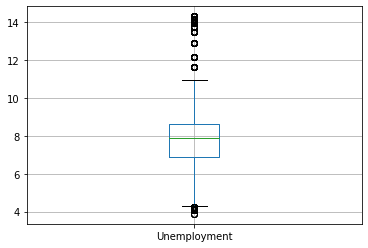

In [101]:
boxplot = Store.boxplot(column=[ 'Unemployment'])

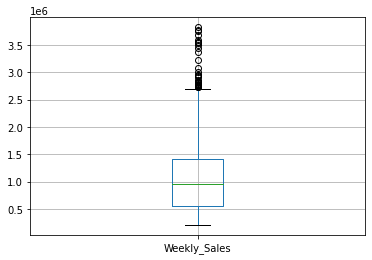

In [102]:
boxplot = Store.boxplot(column=[ 'Weekly_Sales'])

---

In [103]:
Store.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Store
20   301397792.46
4    299543953.38
14   288999911.34
13   286517703.80
2    275382440.98
Name: Weekly_Sales, dtype: float64

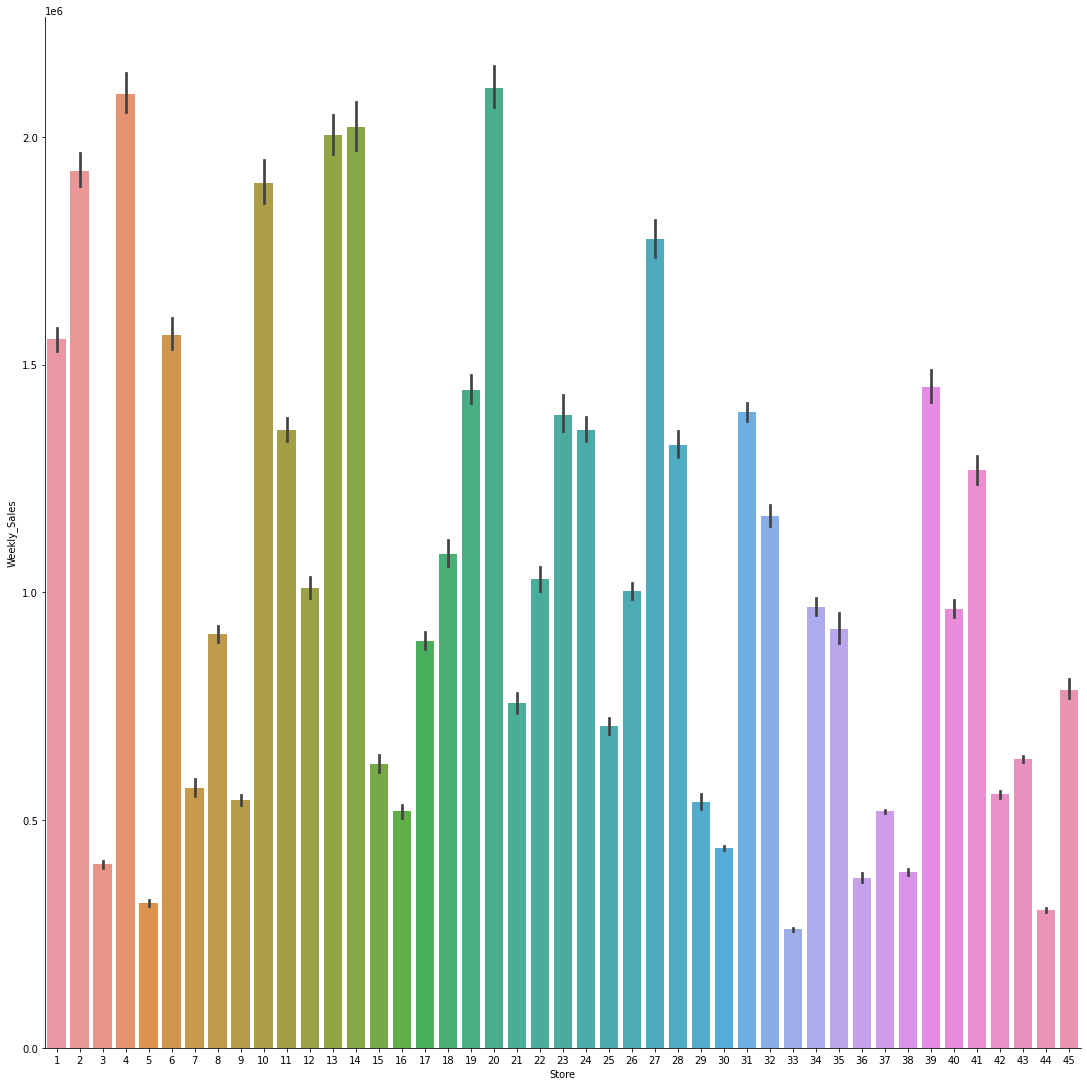

In [104]:
sns.catplot(x="Store", y="Weekly_Sales", kind="bar",height=15 , data=Store)

In [105]:
Store.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).head(1)

Store
14   317569.95
Name: Weekly_Sales, dtype: float64

In [106]:
#maximun coefficient variation
max_coeff_var = ((Store.groupby('Store')['Weekly_Sales'].std())/(Store.groupby('Store')['Weekly_Sales'].mean()))*100
max_coeff_var.sort_values(ascending=False).head(5)

Store
35   22.97
7    19.73
15   19.34
29   18.37
23   17.97
Name: Weekly_Sales, dtype: float64

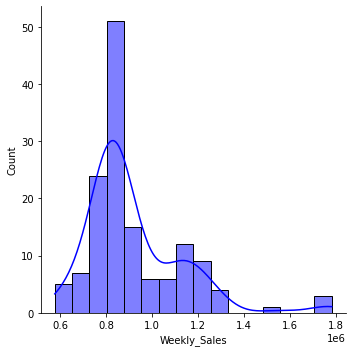

In [107]:
# Remenber that std or Max coefficient of mean to standard deviation can be checked in a distribution plot to corroborate
stores = Store.groupby('Store')
store_35 = stores.get_group(35)
sns.displot(store_35.Weekly_Sales, color='blue', label='Weekly Sales for Store 35', kde=True)

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

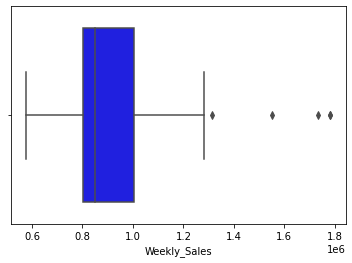

In [108]:
sns.boxplot(store_35.Weekly_Sales, color='blue')

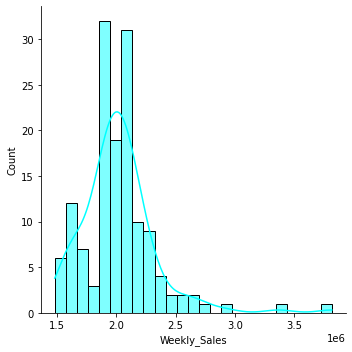

In [109]:
stores = Store.groupby('Store')
store_14 = stores.get_group(14)
sns.displot(store_14.Weekly_Sales, color='cyan', label='Weekly Sales for Store 14', kde=True)

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

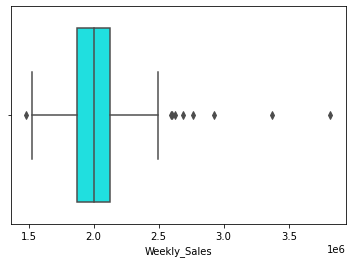

In [110]:
sns.boxplot(store_14.Weekly_Sales, color='cyan')

In [111]:
Store.groupby('Store')['Unemployment'].sum().sort_values(ascending=False).head(1)

Store
12   1875.66
Name: Unemployment, dtype: float64

In [112]:
out = Store.sort_values(by=["Store", "Date"]) \
        .groupby(["Store"]) \
        .agg(growth_Q3=("Weekly_Sales", lambda x: (x.iloc[2] - x.iloc[1])/(x.iloc[1]) * 100))
out.idxmax()

growth_Q3    16
dtype: int64

In [113]:
# Sales for third quarterly in 2012
Q3 = Store[(Store['Date'] > '2012-07-01') & (Store['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = Store[(Store['Date'] > '2012-04-01') & (Store['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

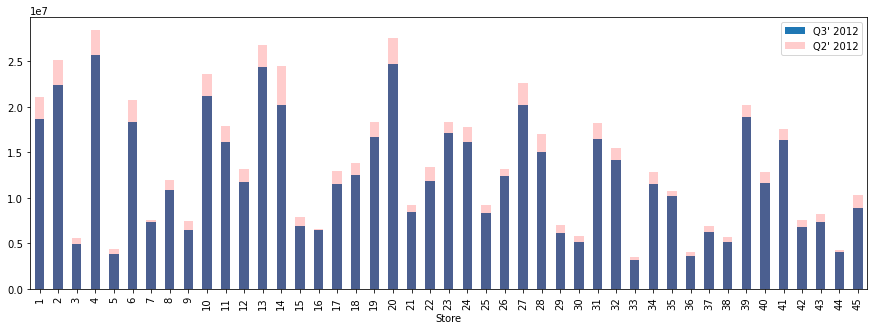

In [114]:
plt.figure(figsize=(15,5))
# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [115]:
Q3.idxmax()+Q3.max()

25652123.35

#### Notes:
Which store had maximum sales?
> The Store with maximun sales is the number 20 with 301,397,792

Which store had maximum standard deviation? the sales vary a lot.

> The store 14 had maximum standard deviation and store 35 has maximum Coefficient of Variance.

Wich store had the more unemployment?

> Store Number 12 had the more unemployment rate

Which store/s has good quarterly growth rate in Q3’2012

> Store number 16 had the maximun growth rate in Q3 overall

> Store number 4 had the the best quarterly growth rate in Q3’2012

> Sales and Unemployment have Outliers, going to deal with it later in the analysis

---

In [116]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10


In [117]:
Store.drop(['year', 'month', 'Holiday_Flag'], axis=1).describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,60.66,3.36,171.58,8.00
std,12.99,564366.62,18.44,0.46,39.36,1.88
min,1.00,209986.25,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,47.46,2.93,131.74,6.89
50%,23.00,960746.04,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,74.94,3.73,212.74,8.62
max,45.00,3818686.45,100.14,4.47,227.23,14.31


In [118]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Date
2010-12-24   80931415.60
2011-12-23   76998241.31
2011-11-25   66593605.26
2010-11-26   65821003.24
2010-12-17   61820799.85
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

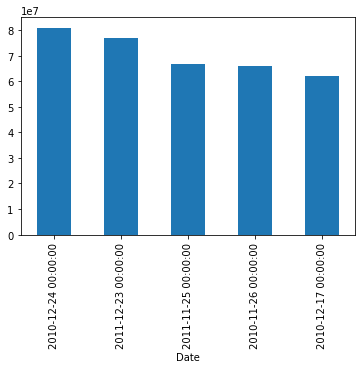

In [119]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [120]:
#Store[(Store['Date'] == '2010-12-24')].sort_values(by='Date',ascending=False)

In [121]:
Store.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=True).head(5)

Date
2011-01-28   39599852.99
2012-01-27   39834974.67
2010-12-31   40432519.00
2011-01-21   40654648.03
2011-01-14   40673678.04
Name: Weekly_Sales, dtype: float64

In [122]:
Store[(Store['Temperature'] >= 100)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
4599,33,2010-07-16,280937.84,0,100.14,2.97,126.15,9.49,2010,7
4707,33,2012-10-08,297753.49,0,100.07,3.81,130.76,7.15,2012,10


In [123]:
Store[(Store['Temperature'] <= 0)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
910,7,2011-04-02,558027.77,0,-2.06,3.01,191.76,8.82,2011,4


In [124]:
Store[(Store['Fuel_Price'] >= 4.45)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1427,10,2012-12-10,1713889.11,0,76.03,4.47,131.11,6.94,2012,12
1713,12,2012-12-10,934917.47,0,71.74,4.47,131.11,10.20,2012,12
4001,28,2012-12-10,1205536.71,0,71.74,4.47,131.11,10.20,2012,12
4716,33,2012-12-10,291781.15,0,79.64,4.47,131.11,6.89,2012,12
5431,38,2012-12-10,437320.66,0,71.74,4.47,131.11,10.20,2012,12
6003,42,2012-12-10,612379.90,0,76.03,4.47,131.11,6.94,2012,12


In [125]:
Store[(Store['Fuel_Price'] <= 2.48)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
5007,36,2010-02-19,470281.03,0,45.66,2.47,210.05,8.55,2010,2


<AxesSubplot:xlabel='year'>

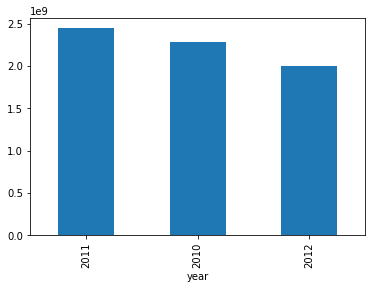

In [126]:
Store.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

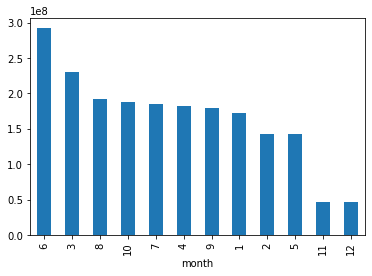

In [127]:
Store[(Store['year'] == 2012)].groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

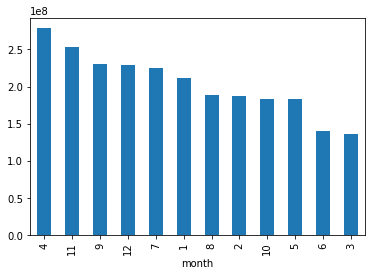

In [128]:
Store[(Store['year'] == 2011)].groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

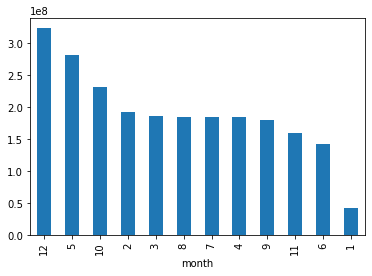

In [129]:
Store[(Store['year'] == 2010)].groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='year'>

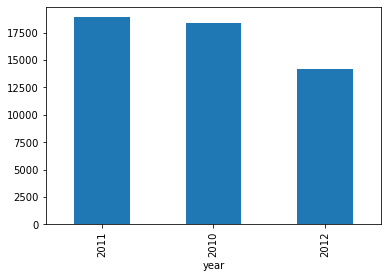

In [130]:
Store.groupby('year')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

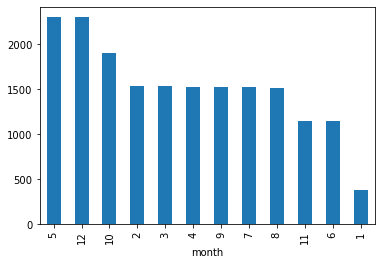

In [131]:
Store[(Store['year'] == 2010)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

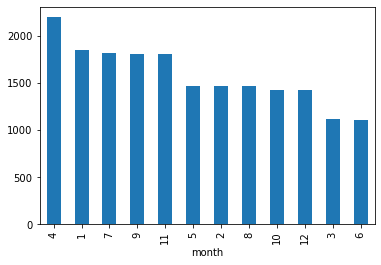

In [132]:
Store[(Store['year'] == 2011)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='month'>

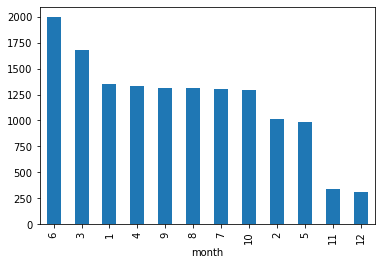

In [133]:
Store[(Store['year'] == 2012)].groupby('month')['Unemployment'].sum().sort_values(ascending=False).plot(kind='bar')

#### Notes:

The date with highest sales is?

> The date with the highest Sales was 2010-December-24 and the date with least Sales was 2011-January-28

Which Date had the warmer and the cooler temperature, it went in holiday? What's the mean?

> Store 33, 2010-07-16 and 2012-10-08 had the warmer days with a 100f, Store 07, 2011-04-02 had the coldest day with -2f, the median temperature is 60f

Which date had the maximum and the minimum fuel price, what's the mean?

> 2012-12-10 had the highest fuel price with 4.47, 2010-02-19 had the least fuel price with 2.47, the mean fuel price is 3.36

Which Year had the more and less sales, and the more and less unemployment

> The year with the highest sales was 2011 and the year with least sales was 2012

> The year with the highest unemployment was 2011 and the year with the least unemployment was 2012

Which month had the more and less Sales, and the more and less unemployment

> 2010 had the highest sales in December, 2011 had the highest sales in April, 2012 had the highest sales in April

> 2010 had the highest unemployment in May, 2011 had the highest unemployment in April, 2012 had the highest unemployment in June

---

In [136]:
Store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Holiday_%
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2010,5,0.00
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2010,12,0.22
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2,0.00
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2,0.00
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,2010,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9,0.00
6431,45,2012-05-10,733455.07,0,64.89,3.98,192.17,8.67,2012,5,0.00
6432,45,2012-12-10,734464.36,0,54.47,4.00,192.33,8.67,2012,12,0.00
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10,0.00


### Questions: 

Search CPI utility https://www.bls.gov/cpi/questions-and-answers.htm#Question_5

Provide a monthly and semester view of sales in units and give insights

check relations bettwen variables (Weekly_Sales | Holiday_Flag | Temperature | Fuel_Price | CPI | Unemployment)

#### Notes:
Percentage of Holiday, sum sales per holiday and non holiday...
> 

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
> 


In [150]:
Store['Holiday_Flag'].value_counts()/len(Store)*100

0   93.01
1    6.99
Name: Holiday_Flag, dtype: float64

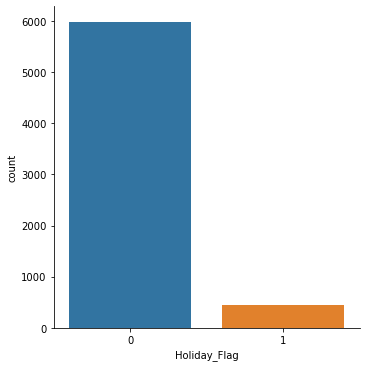

In [148]:
sns.catplot(x="Holiday_Flag", kind="count", data=Store)